1. Read and visualise the data

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

K-means clustering

In [2]:
country=pd.read_csv('F:\\new\\python\\Country-data.csv',sep=",",encoding="ISO-8859-1",header=0)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country.shape

(167, 10)

In [4]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# clean the data

In [6]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# prepare the data for modeling.

In [8]:
group_df=country.groupby('country')['gdpp'].sum()
group_df=group_df.reset_index()
group_df.head()

,country,gdpp
0,Afghanistan,553
1,Albania,4090
2,Algeria,4460
3,Angola,3530
4,Antigua and Barbuda,12200


In [9]:
income=country.groupby('country')['income'].sum()
income=income.reset_index()
income.head()

,country,income
0,Afghanistan,1610
1,Albania,9930
2,Algeria,12900
3,Angola,5900
4,Antigua and Barbuda,19100


In [10]:
group_df=pd.merge(group_df,income,on='country',how='inner')
group_df.head()

,country,gdpp,income
0,Afghanistan,553,1610
1,Albania,4090,9930
2,Algeria,4460,12900
3,Angola,3530,5900
4,Antigua and Barbuda,12200,19100


In [11]:
mort_child=country.groupby('country')['child_mort'].sum()
mort_child=mort_child.reset_index()
mort_child.head()

,country,child_mort
0,Afghanistan,90.2
1,Albania,16.6
2,Algeria,27.3
3,Angola,119.0
4,Antigua and Barbuda,10.3


In [12]:
group_df=pd.merge(group_df,mort_child,on='country',how='inner')
group_df.head()

,country,gdpp,income,child_mort
0,Afghanistan,553,1610,90.2
1,Albania,4090,9930,16.6
2,Algeria,4460,12900,27.3
3,Angola,3530,5900,119.0
4,Antigua and Barbuda,12200,19100,10.3


In [13]:
# outlier tretment

{'whiskers': [<matplotlib.lines.Line2D at 0x14d3f38bd88>,
 'caps': [<matplotlib.lines.Line2D at 0x14d3f396a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d3f377fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x14d3f396f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x14d3f39bf88>],
 'means': []}

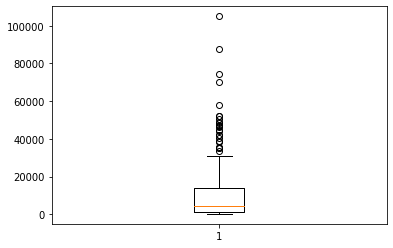

In [14]:
plt.boxplot(group_df['gdpp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14d3f437fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x14d3f43bb48>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d3f437708>],
 'medians': [<matplotlib.lines.Line2D at 0x14d3f43fc48>],
 'fliers': [<matplotlib.lines.Line2D at 0x14d3f444c48>],
 'means': []}

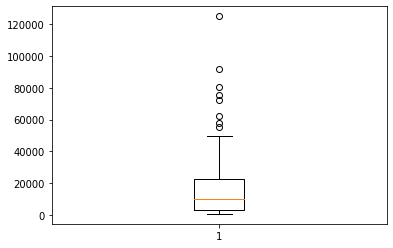

In [15]:
plt.boxplot(group_df['income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14d3f4ad348>,
 'caps': [<matplotlib.lines.Line2D at 0x14d3f4adc08>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d3f4a88c8>],
 'medians': [<matplotlib.lines.Line2D at 0x14d3f4b1b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x14d3f4b6ac8>],
 'means': []}

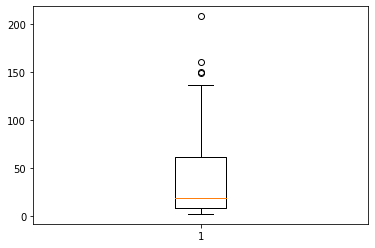

In [16]:
plt.boxplot(group_df['child_mort'])

In [17]:
# removing (statistical) outliers
Q1 = group_df.gdpp.quantile(0.05)
Q3 = group_df.gdpp.quantile(0.95)
IQR = Q3 - Q1
group_df = group_df[(group_df.gdpp >= Q1 - 1.5*IQR) & (group_df.gdpp <= Q3 + 1.5*IQR)]


Q1 = group_df.income.quantile(0.05)
Q3 = group_df.income.quantile(0.95)
IQR = Q3 - Q1
group_df = group_df[(group_df.income >= Q1 - 1.5*IQR) & (group_df.income <= Q3 + 1.5*IQR)]


Q1 = group_df.child_mort.quantile(0.05)
Q3 = group_df.child_mort.quantile(0.95)
IQR = Q3 - Q1
group_df = group_df[(group_df.child_mort >= Q1 - 1.5*IQR) & (group_df.child_mort <= Q3 + 1.5*IQR)]


In [18]:
# Rescalling

In [19]:
res=group_df[['gdpp','income','child_mort']]
res.head()

,gdpp,income,child_mort
0,553,1610,90.2
1,4090,9930,16.6
2,4460,12900,27.3
3,3530,5900,119.0
4,12200,19100,10.3


In [20]:
#instantiate
scaler=StandardScaler()
#fit transform
res_scaled=scaler.fit_transform(res)
res_scaled.shape

(166, 3)

In [21]:
res_scaled=pd.DataFrame(res_scaled)
res_scaled.columns=['gdpp','income','child_mort']
res_scaled.head()

,gdpp,income,child_mort
0,-0.678732,-0.857748,1.285341
1,-0.479766,-0.378307,-0.542572
2,-0.458953,-0.207160,-0.276829
3,-0.511268,-0.610536,2.000611
4,-0.023556,0.150116,-0.699037


In [22]:
# modelling

In [23]:
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(res_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
kmeans.labels_

array([2, 3, 3, 2, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3,
       3, 1, 3, 2, 2, 3, 2, 0, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 0, 0,
       0, 3, 3, 3, 3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 0, 2, 0, 3, 3, 2, 2, 3,
       2, 3, 0, 2, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 2, 2, 1, 3, 2, 3, 3, 2,
       2, 3, 3, 1, 3, 2, 2, 3, 3, 2, 0, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       0, 0, 2, 2, 1, 0, 2, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 0, 2, 3, 3, 2,
       1, 3, 0, 3, 3, 0, 0, 3, 3, 2, 3, 0, 1, 3, 2, 3, 2, 2, 3, 3, 3, 2,
       2, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 2])

In [25]:
# finding optimal numbers of clusters
# elbow curve

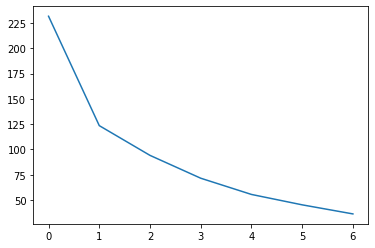

In [26]:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(res_scaled)
    
    ssd.append(kmeans.inertia_)

plt.plot(ssd)    
    

In [27]:
# silhouette score 

In [28]:
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(res_scaled)
    cluster_labels=kmeans.labels_
    silhouette_avg= silhouette_score(res_scaled,cluster_labels)
    print('For n_clusters={0}, the silhouette score is {1}'.format(num_clusters,silhouette_avg))

    

For n_clusters=2, the silhouette score is 0.5655742072957856
For n_clusters=3, the silhouette score is 0.5311874946349607
For n_clusters=4, the silhouette score is 0.531699886308155
For n_clusters=5, the silhouette score is 0.485756904515866
For n_clusters=6, the silhouette score is 0.45934034667648344
For n_clusters=7, the silhouette score is 0.4497681861982357
For n_clusters=8, the silhouette score is 0.46073959050151814


In [29]:
# final model with k=3

In [30]:
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(res_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [32]:
group_df['cluster_id']=kmeans.labels_
group_df.head()

,country,gdpp,income,child_mort,cluster_id
0,Afghanistan,553,1610,90.2,0
1,Albania,4090,9930,16.6,1
2,Algeria,4460,12900,27.3,1
3,Angola,3530,5900,119.0,0
4,Antigua and Barbuda,12200,19100,10.3,1


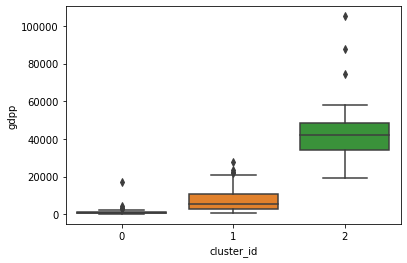

In [33]:
sns.boxplot(x='cluster_id',y='gdpp',data=group_df)

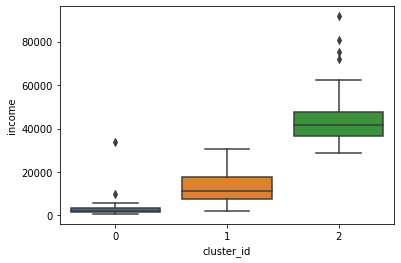

In [34]:
sns.boxplot(x='cluster_id',y='income',data=group_df)

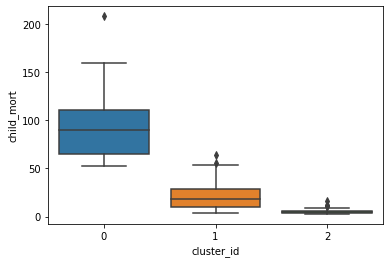

In [35]:
sns.boxplot(x='cluster_id',y='child_mort',data=group_df)

In [36]:
#Hierarchical Clustering

In [37]:
res_scaled.head()

,gdpp,income,child_mort
0,-0.678732,-0.857748,1.285341
1,-0.479766,-0.378307,-0.542572
2,-0.458953,-0.207160,-0.276829
3,-0.511268,-0.610536,2.000611
4,-0.023556,0.150116,-0.699037


In [38]:
group_df.head()

,country,gdpp,income,child_mort,cluster_id
0,Afghanistan,553,1610,90.2,0
1,Albania,4090,9930,16.6,1
2,Algeria,4460,12900,27.3,1
3,Angola,3530,5900,119.0,0
4,Antigua and Barbuda,12200,19100,10.3,1


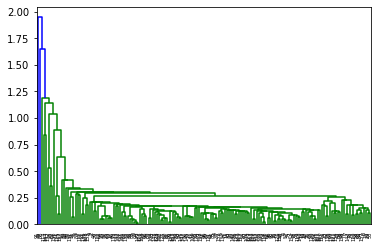

In [41]:
# single linkage
mergings = linkage(res_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

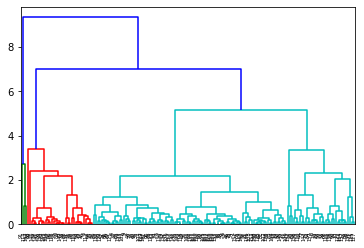

In [43]:
# complete linkage
mergings = linkage(res_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [44]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [45]:
# assign cluster labels
group_df['cluster_labels'] = cluster_labels
group_df.head()

,country,gdpp,income,child_mort,cluster_id,cluster_labels
0,Afghanistan,553,1610,90.2,0,0
1,Albania,4090,9930,16.6,1,1
2,Algeria,4460,12900,27.3,1,1
3,Angola,3530,5900,119.0,0,0
4,Antigua and Barbuda,12200,19100,10.3,1,1


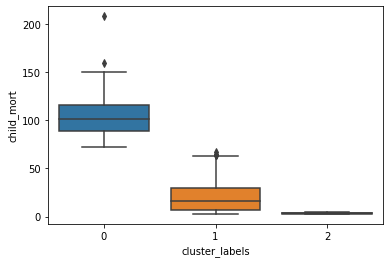

In [46]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=group_df)

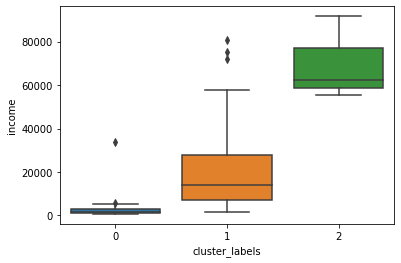

In [48]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=group_df)

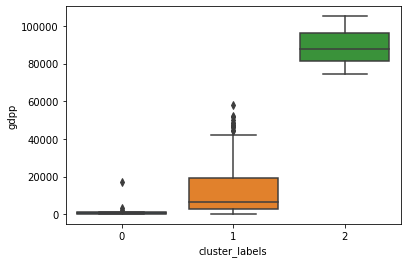

In [49]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=group_df)

In [ ]:
Top 5 contries-
1-Burundi
2-Liberia
3-Congo, Dem. Rep.
4-Niger
5-Sierra Leone